In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
import numpy as np
import os

In [2]:
FastFood_data = pd.read_csv("data_sources/FF_Restaurants_Per_Capita_US-States.csv")
obesity_data = pd.read_csv("data_sources/obtained_data_Obesity.csv") 

#Merge Fast Food Data and Obesity Data
FastFood_vs_Obesity_df = pd.merge(FastFood_data, obesity_data, how='right')
FastFood_vs_Obesity_df.rename(columns={'State Name':'State', 'state code':'State Code', 'alpha code':'Alpha Code','Restaurants Per Capita':'Per 10K Residents FastFood Restaurants Per Capita', 'Value': '% Obesity'}, inplace = True)
FastFood_vs_Obesity_df = FastFood_vs_Obesity_df.drop(columns=['Report Type', 'Measure Name', 'Score', 'Lower CI', 'Upper CI', 'Source', 'Source Year'])
FastFood_vs_Obesity_df = FastFood_vs_Obesity_df.drop([50,51,23,47,5,10])

FastFood_vs_Obesity_df.to_csv('data_sources\FastFood_vs_Obesity.csv',index = False, header=True)
FastFood_vs_Obesity_df



,State,State Code,Alpha Code,Per 10K Residents FastFood Restaurants Per Capita,Number of Fast Food Restaurants,Population (2019),Edition,Rank,% Obesity
0,Alabama,1.0,AL,6.3,4442.0,4903185.0,2019,45.0,36.2
1,Alaska,2.0,AK,2.6,411.0,731545.0,2019,15.0,29.5
2,Arizona,4.0,AZ,4.6,4388.0,7278717.0,2019,15.0,29.5
3,Arkansas,5.0,AR,4.7,2364.0,3017825.0,2019,48.0,37.1
4,California,6.0,CA,3.6,31473.0,39512223.0,2019,5.0,25.8
6,Connecticut,9.0,CT,2.4,2616.0,3565287.0,2019,7.0,27.4
7,Delaware,10.0,DE,4.1,785.0,973764.0,2019,33.0,33.5
8,Florida,12.0,FL,3.3,15073.0,21477737.0,2019,24.0,30.7
9,Georgia,13.0,GA,4.9,8749.0,10617423.0,2019,30.0,32.5
11,Idaho,16.0,ID,3.8,1244.0,1787065.0,2019,12.0,28.4


The correlation between both factors is 0.75


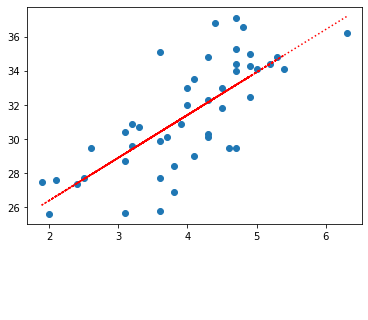

In [5]:
def correlation(x, y, i, j):
    import matplotlib.pyplot as plt
    import scipy.stats as sts
    correlation = sts.pearsonr(x, y)
    slope, c_int, r, p, std_err = sts.linregress(x, y)
    fit = slope * x + c_int
    line_equation = f'y = {str(round(slope,2))}x + {str(round(c_int,2))}'
    plt.annotate(line_equation,(i,j),fontsize=13,color='black')
    plt.plot(x,fit,':r')
    print(f'The correlation between both factors is {round(correlation[0],2)}')


#Corelation Per 10K Residents FastFood Restaurants Per Capita 2019 vs % Obesity 2019
    
x_data = FastFood_vs_Obesity_df["Per 10K Residents FastFood Restaurants Per Capita"]
y_data = FastFood_vs_Obesity_df["% Obesity"]
plt.scatter(x_data, y_data)
correlation(x_data, y_data, 3, 20)
plt.savefig("output/10Kpopulation_vs_Obesity.png")
plt.show()







The correlation between both factors is 0.99


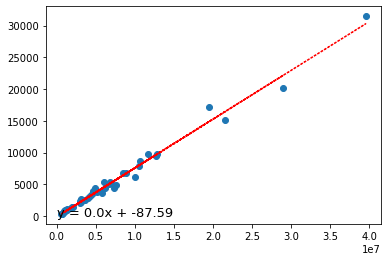

In [7]:
#Corelation Total Population 2019 vs Number of Fast Food Restaurants 2019

x_data = FastFood_vs_Obesity_df["Population (2019)"]
y_data = FastFood_vs_Obesity_df["Number of Fast Food Restaurants "]
plt.scatter(x_data, y_data)
correlation(x_data, y_data, 3, 20)
plt.savefig("output/Population_vs_Restaurants.png")
plt.show()


